In [5]:
%reload_ext autoreload
%autoreload 2

from databallpy import get_saved_game

import accessible_space

game_id = "J03WQQ"

path = "../../datasets/IDSSE/"
game = get_saved_game(name=game_id, path=path)
coordinate_cols = []
player_to_team = {}
col_ids = game.get_column_ids() + ["ball"]
for col in col_ids: 
    coordinate_cols.append(
        [f"{col}_x", f"{col}_y", f"{col}_vx", f"{col}_vy"]
    )
    player_to_team[str(col)] = col.split("_")[0]

game.tracking_data.add_velocity(col_ids, max_velocity=30)
game.synchronise_tracking_and_event_data()
game.tracking_data.add_individual_player_possession()
df_frameified = accessible_space.per_object_frameify_tracking_data(game.tracking_data, "frame", coordinate_cols, col_ids, player_to_team, new_coordinate_cols=("player_x", "player_y", "player_vx", "player_vy"))

In [6]:
import importlib
import accessible_space.interface
importlib.reload(accessible_space.interface)
from accessible_space.interface import get_dangerous_accessible_space


df_frameified_filtered = df_frameified[df_frameified["frame"].isin([113945, 113950])]
df_frameified_filtered = df_frameified_filtered[df_frameified_filtered["player_x"].notna()]
display(df_frameified_filtered)
df_frameified_filtered["player_possession_manually"] = "away_23"
pitch_result = get_dangerous_accessible_space(df_frameified_filtered, frame_col="frame", player_col="player_id", ball_player_id="ball", x_col="player_x", y_col="player_y", vx_col="player_vx", vy_col="player_vy", team_col="team_id", period_col="period_id", team_in_possession_col="team_possession", attacking_direction_col=None, infer_attacking_direction=True, respect_offside=True, player_in_possession_col="player_possession_manually", use_progress_bar=False)

df_frameified_filtered["DAS"] = pitch_result.das


,frame,player_x,player_y,player_vx,player_vy,player_id,team_id,ball_z,ball_status,team_possession,...,away_24_velocity,away_5_velocity,ball_velocity,ball_ax,ball_ay,ball_acceleration,databallpy_event,event_id,sync_certainty,player_possession
267086,113945,3.70,17.19,0.750,-2.125,home_28,home,1.76,alive,away,...,NaN,7.661796,4.403479,-2.678571,0.520833,2.728738,None,-999,NaN,None
267091,113950,3.86,16.73,0.625,-2.375,home_28,home,1.81,alive,away,...,NaN,7.850159,4.056245,0.520833,1.190476,1.299423,None,-999,NaN,None
430227,113945,-21.00,-23.46,1.750,-3.625,home_25,home,1.76,alive,away,...,NaN,7.661796,4.403479,-2.678571,0.520833,2.728738,None,-999,NaN,None
430232,113950,-20.69,-24.18,1.625,-3.625,home_25,home,1.81,alive,away,...,NaN,7.850159,4.056245,0.520833,1.190476,1.299423,None,-999,NaN,None
919650,113945,-16.58,8.17,0.750,-3.125,home_29,home,1.76,alive,away,...,NaN,7.661796,4.403479,-2.678571,0.520833,2.728738,None,-999,NaN,None
919655,113950,-16.46,7.54,0.375,-3.125,home_29,home,1.81,alive,away,...,NaN,7.850159,4.056245,0.520833,1.190476,1.299423,None,-999,NaN,None
1082791,113945,-2.24,-21.75,-3.000,-8.125,home_9,home,1.76,alive,away,...,NaN,7.661796,4.403479,-2.678571,0.520833,2.728738,None,-999,NaN,None
1082796,113950,-2.85,-23.38,-3.250,-8.000,home_9,home,1.81,alive,away,...,NaN,7.850159,4.056245,0.520833,1.190476,1.299423,None,-999,NaN,None
1245932,113945,-15.60,21.96,1.375,-2.375,home_19,home,1.76,alive,away,...,NaN,7.661796,4.403479,-2.678571,0.520833,2.728738,None,-999,NaN,None
1245937,113950,-15.35,21.48,1.250,-2.500,home_19,home,1.81,alive,away,...,NaN,7.850159,4.056245,0.520833,1.190476,1.299423,None,-999,NaN,None


SORT:  [[-- -- -- -- -- -- -- -- -- -- -- -3.7 2.24 2.44 14.4 15.6 16.36 16.58
  21.0 28.83 31.56 49.37]
 [-- -- -- -- -- -- -- -- -- -- -- -3.86 2.42 2.85 14.33 15.35 16.12
  16.46 20.69 28.73 31.11 49.2]]
SECOND_LAST_DEFENDER_NORM_X >> [31.11 31.56]


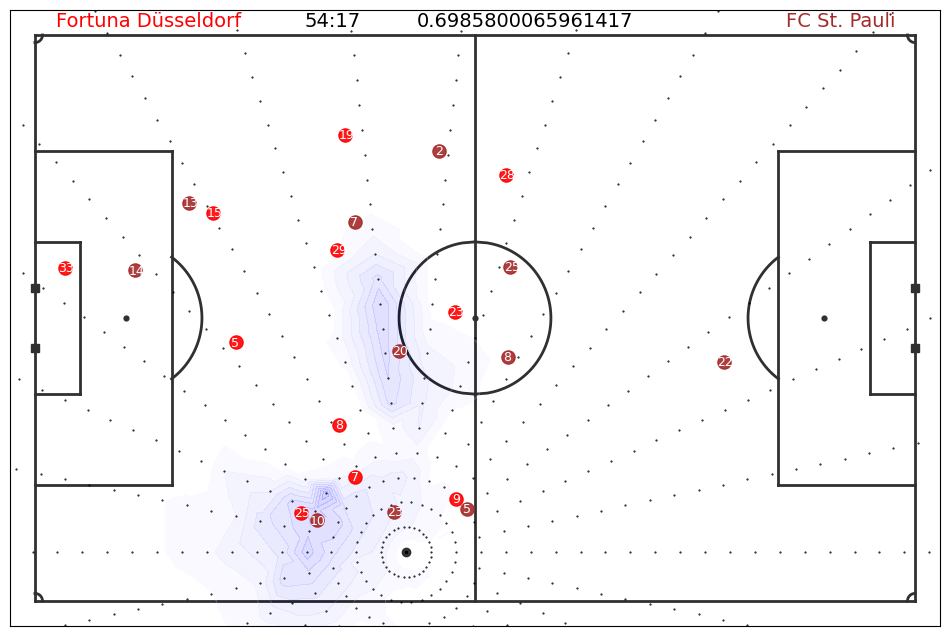

In [89]:
from databallpy.visualize import plot_soccer_pitch, plot_tracking_data
import matplotlib.pyplot as plt

idx = game.tracking_data[game.tracking_data["frame"]==113945].index[0]
fig, ax = plt.subplots(figsize=(12, 8))
plot_soccer_pitch(pitch_color="white", fig=fig, ax=ax)
plot_tracking_data(game, idx, fig=fig, ax=ax, team_colors=["red", "brown"], variable_of_interest=pitch_result.das.iloc[0])
accessible_space.plot_expected_completion_surface(pitch_result.dangerous_result, frame_index=0, color="blue")
plt.show()

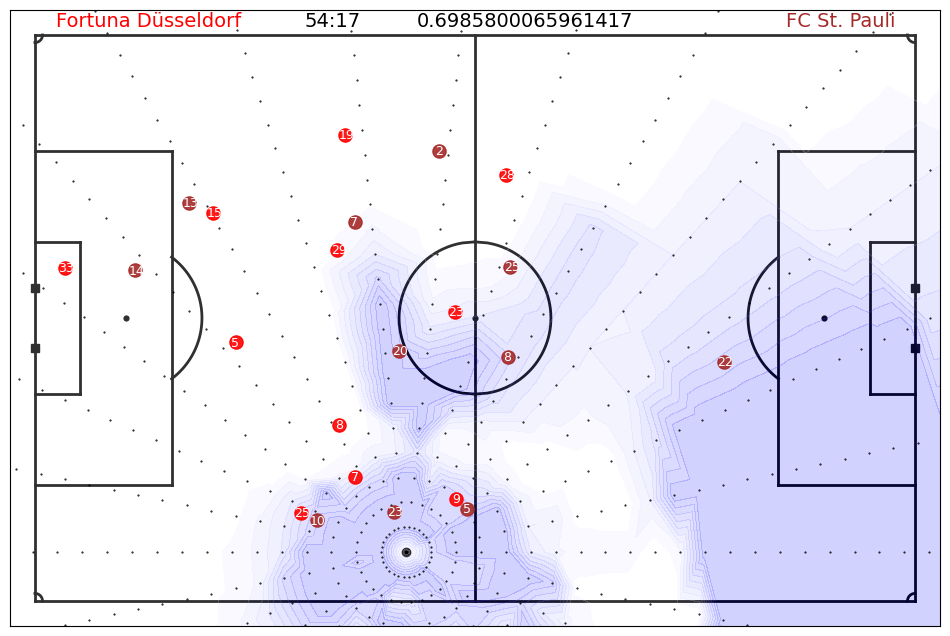

In [90]:
from databallpy.visualize import plot_soccer_pitch, plot_tracking_data
import matplotlib.pyplot as plt

idx = game.tracking_data[game.tracking_data["frame"]==113945].index[0]
fig, ax = plt.subplots(figsize=(12, 8))
plot_soccer_pitch(pitch_color="white", fig=fig, ax=ax)
plot_tracking_data(game, idx, fig=fig, ax=ax, team_colors=["red", "brown"], variable_of_interest=pitch_result.das.iloc[0])
accessible_space.plot_expected_completion_surface(pitch_result.simulation_result, frame_index=0, color="blue")
plt.show()